In [37]:
import numpy as np
import pandas as pd
import ipyvolume as ipv
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [13]:
df = pd.read_excel("MR15E01PC12-irm.xlsx")
df

,Name,Depth,0.004999999999999999,0.005570956920979214,0.006207112203081236,0.00691591093740999,0.007705648380328007,0.008585567035004108,0.009565964818837426,0.01065831558266921,...,0.3778869006997082,0.4210383289600847,0.4691172785435415,0.5226864299306152,0.5823727168647751,0.6488746635214575,0.7229705595185846,0.805527568442854,0.8975118764912551,1
0,MR15E01PC12S01-09,20.305556,0.018356,0.021586,0.025098,0.029376,0.034280,0.041167,0.048443,0.059959,...,0.979064,0.982824,0.985301,0.988106,0.990582,0.992660,0.994666,0.996609,0.998400,1
1,MR15E01PC12S01-33,75.155000,0.019950,0.023555,0.027743,0.033230,0.039549,0.047560,0.056968,0.070400,...,0.981175,0.984556,0.987388,0.990208,0.992751,0.995152,0.996636,0.997975,0.998802,1
2,MR15E01PC12S02-09,114.061111,0.011293,0.015034,0.019488,0.024751,0.031046,0.038899,0.047847,0.061561,...,0.972135,0.976400,0.979917,0.983256,0.986656,0.989299,0.992157,0.994710,0.997449,1
3,MR15E01PC12S02-33,169.590000,0.030366,0.034371,0.039212,0.045287,0.052867,0.061787,0.072293,0.087810,...,0.991717,0.993007,0.994278,0.995891,0.996547,0.997089,0.997956,0.998811,0.999344,1
4,MR15E01PC12S03-09,215.050000,0.022883,0.027450,0.033259,0.039952,0.047938,0.057710,0.069173,0.085499,...,0.980568,0.983477,0.985996,0.988467,0.990372,0.992211,0.994182,0.996256,0.997505,1
5,MR15E01PC12S03-33,269.950000,0.023576,0.028629,0.034549,0.041738,0.050471,0.060294,0.072537,0.090008,...,0.980963,0.983715,0.985659,0.987667,0.990289,0.992029,0.994343,0.995845,0.998159,1
6,MR15E01PC12S04-09,315.027778,0.021215,0.026416,0.032270,0.039850,0.048749,0.059161,0.071233,0.088864,...,0.976958,0.979863,0.982624,0.985454,0.988102,0.990670,0.992808,0.995336,0.997524,1
7,MR15E01PC12S05-09,415.533333,0.022618,0.027627,0.033424,0.040487,0.049298,0.059744,0.072388,0.090412,...,0.982712,0.985114,0.987517,0.989585,0.991093,0.992790,0.994761,0.996362,0.998026,1
8,MR15E01PC12S05-33,471.155000,0.028649,0.033276,0.039183,0.045522,0.053971,0.064089,0.076507,0.094819,...,0.982466,0.984971,0.987128,0.988927,0.991029,0.992876,0.994300,0.996033,0.997742,1
9,MR15E01PC12S06-09,514.655556,0.025105,0.030553,0.036816,0.044334,0.053210,0.064217,0.076841,0.095298,...,0.984577,0.986702,0.988623,0.990660,0.991904,0.993693,0.995169,0.996812,0.998306,1


In [14]:
from sklearn.decomposition import PCA

In [59]:
spam = df.reindex(columns=df.columns[2:])
ma = spam.as_matrix()
sm1 = ScalarMappable(norm=Normalize(vmin=0, vmax=700), cmap="Reds")
sm2 = ScalarMappable(norm=Normalize(vmin=5, vmax=1200), cmap="Blues")

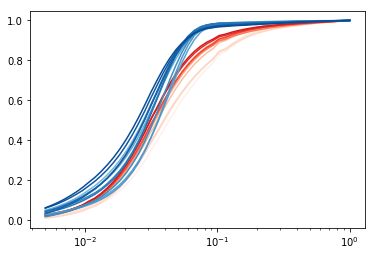

In [60]:
ax = plt.subplot(111)
for i in range(21):
    spam = df.iloc[i]
    depth = spam.iloc[1]
    egg = spam.iloc[2:]
    if depth < 550:
        color = sm1.to_rgba(depth)
    else:
        color = sm2.to_rgba(depth)
    ax.plot(egg.index, egg.values, color=color)
ax.set_xscale("log")
plt.show()

In [48]:
pca = PCA(n_components=3)
X_r = pca.fit_transform(ma)
X_r

array([[ 0.64852815, -0.05937867,  0.04427948],
       [ 0.49085486, -0.08050087,  0.01761009],
       [ 0.52572867, -0.06881547, -0.00807571],
       [ 0.26593904, -0.04247655,  0.02332733],
       [ 0.19647406, -0.03913883, -0.01955578],
       [ 0.1480248 , -0.03515613, -0.02099959],
       [ 0.16346031, -0.05642487, -0.03163775],
       [ 0.13461256, -0.0495968 , -0.02539448],
       [ 0.04864717, -0.04883158, -0.03809411],
       [ 0.02246074, -0.03305318, -0.0413737 ],
       [-0.33566372, -0.06693567,  0.01683587],
       [-0.26813768,  0.00685553,  0.03026867],
       [ 0.08223687,  0.24185107,  0.0495447 ],
       [ 0.05053708,  0.28626222,  0.02855113],
       [-0.06823762,  0.21576091, -0.02358277],
       [-0.26868614,  0.08606287, -0.01636546],
       [-0.24808661,  0.10680666, -0.02927501],
       [-0.34099211, -0.01204238, -0.01406885],
       [-0.3147992 , -0.02284846, -0.02288772],
       [-0.43441518, -0.12852133,  0.03601401],
       [-0.49848606, -0.19987848,  0.044

In [61]:
x = X_r[:,0]
x = x / np.max(x)
y = X_r[:,1]
y = y / np.max(y)
z = X_r[:,2]
z = z / np.max(z)
depth = df["Depth"]
color = sm1.to_rgba(depth[depth<550])[:, 0:3]
spam = sm2.to_rgba(depth[depth>550])[:, 0:3]
color = np.vstack((color, spam))
color.shape

(21, 3)

In [62]:
ipv.clear()
ipv.scatter(x, y, z, size=2, color=color, marker="sphere")
ipv.show()

A Jupyter Widget